# Null Parameter Distributions — Orientation Shuffle (subj01)

Plots parameter distributions from the orientation-shuffle null model for subj01, V1.
Globbing for whatever `.pt` files currently exist (run stopped mid-way).

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.dirname(os.getcwd()))
from sfp_nsdsyn import two_dimensional_model as model
from sfp_nsdsyn.visualization import plot_2D_model_results as vis2D

with open(os.path.join(os.path.dirname(os.getcwd()), 'config.json')) as f:
    config = json.load(f)

OUTPUT_DIR = config['OUTPUT_DIR']

/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dset        = 'nsdsyn'
subj        = 'subj01'
roi         = 'V1'
vs          = 'pRFsize'
lr          = 0.0005
max_epoch   = 30000
shuffle_type = 'orientation'

PARAMS_2D = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']

In [5]:
# Glob all existing null .pt files for this subject/shuffle_type
perm_dir = os.path.join(
    OUTPUT_DIR, 'sfp_model', 'results_2D', dset,
    'perm', f'shuf-{shuffle_type}', subj, '**')

null_model_paths = sorted(glob.glob(os.path.join(perm_dir, '*.pt'), recursive=True))

print(f'Found {len(null_model_paths)} null model files')
null_model_paths[:3]

Found 201 null model files


['/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/perm/shuf-orientation/subj01/batch_000/perm-0_model-params_lr-0.0005_eph-30000_sub-subj01_roi-V1_vs-pRFsize.pt',
 '/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/perm/shuf-orientation/subj01/batch_000/perm-10_model-params_lr-0.0005_eph-30000_sub-subj01_roi-V1_vs-pRFsize.pt',
 '/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/perm/shuf-orientation/subj01/batch_000/perm-11_model-params_lr-0.0005_eph-30000_sub-subj01_roi-V1_vs-pRFsize.pt']

In [6]:
# Load null models into a DataFrame
null_df = model.load_all_models(null_model_paths, *['sub', 'lr', 'eph', 'roi', 'perm'])
null_df['perm'] = null_df['perm'].astype(int)

print(f'Loaded {len(null_df)} permutation fits, {null_df["perm"].nunique()} unique perms')
null_df.head()

Loaded 201 permutation fits, 201 unique perms


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,perm
0,2.503184,0.141043,0.257715,-0.001211,0.013157,-0.245820,0.064886,0.001256,-0.013928,subj01,0.0005,30000,V1,0
0,2.531349,0.138239,0.264552,-0.015349,-0.034609,0.132973,0.014938,-0.043255,-0.000014,subj01,0.0005,30000,V1,10
0,2.507923,0.140002,0.258961,0.061241,-0.018348,0.048470,-0.082364,-0.052270,-0.000851,subj01,0.0005,30000,V1,11
0,2.523282,0.140336,0.258438,-0.002346,-0.001673,-0.046021,-0.091234,0.009761,-0.008179,subj01,0.0005,30000,V1,12
0,2.517379,0.146645,0.263711,0.032777,0.031801,-0.214859,-0.022716,-0.008202,-0.009098,subj01,0.0005,30000,V1,13


In [7]:
# Load actual (observed) model for subj01 V1
actual_model_path = os.path.join(
    OUTPUT_DIR, 'sfp_model', 'results_2D', dset,
    f'model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-{roi}_vs-{vs}.pt')

actual_df = model.load_all_models([actual_model_path], *['lr', 'eph', 'sub', 'roi'])
actual_means = actual_df[PARAMS_2D].mean().to_dict()

print('Actual parameter values:')
for k, v in actual_means.items():
    print(f'  {k:12s}: {v:.4f}')

Actual parameter values:
  sigma       : 2.5362
  slope       : 0.1391
  intercept   : 0.2719
  p_1         : -0.0728
  p_2         : 0.0032
  p_3         : -0.2560
  p_4         : 0.0141
  A_1         : 0.0808
  A_2         : -0.0157


In [8]:
# Mean per permutation (one row per perm; only subj01 here so groupby perm == per-perm value)
null_param_df = null_df.groupby('perm')[PARAMS_2D].mean().reset_index()
print(f'null_param_df shape: {null_param_df.shape}')
null_param_df.head()

null_param_df shape: (201, 10)


,perm,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
0,0,2.503184,0.141043,0.257715,-0.001211,0.013157,-0.245820,0.064886,0.001256,-0.013928
1,1,2.507760,0.139947,0.253958,0.023192,-0.024955,-0.053961,-0.003183,-0.046804,0.000190
2,2,2.507753,0.141492,0.253352,0.056146,-0.010912,0.015749,0.044103,0.007863,-0.004777
3,3,2.492115,0.143328,0.260675,0.058983,-0.022195,-0.137381,-0.066503,0.013515,0.000415
4,4,2.513590,0.141318,0.262818,-0.000914,0.010153,0.058123,-0.149086,-0.008504,0.005648


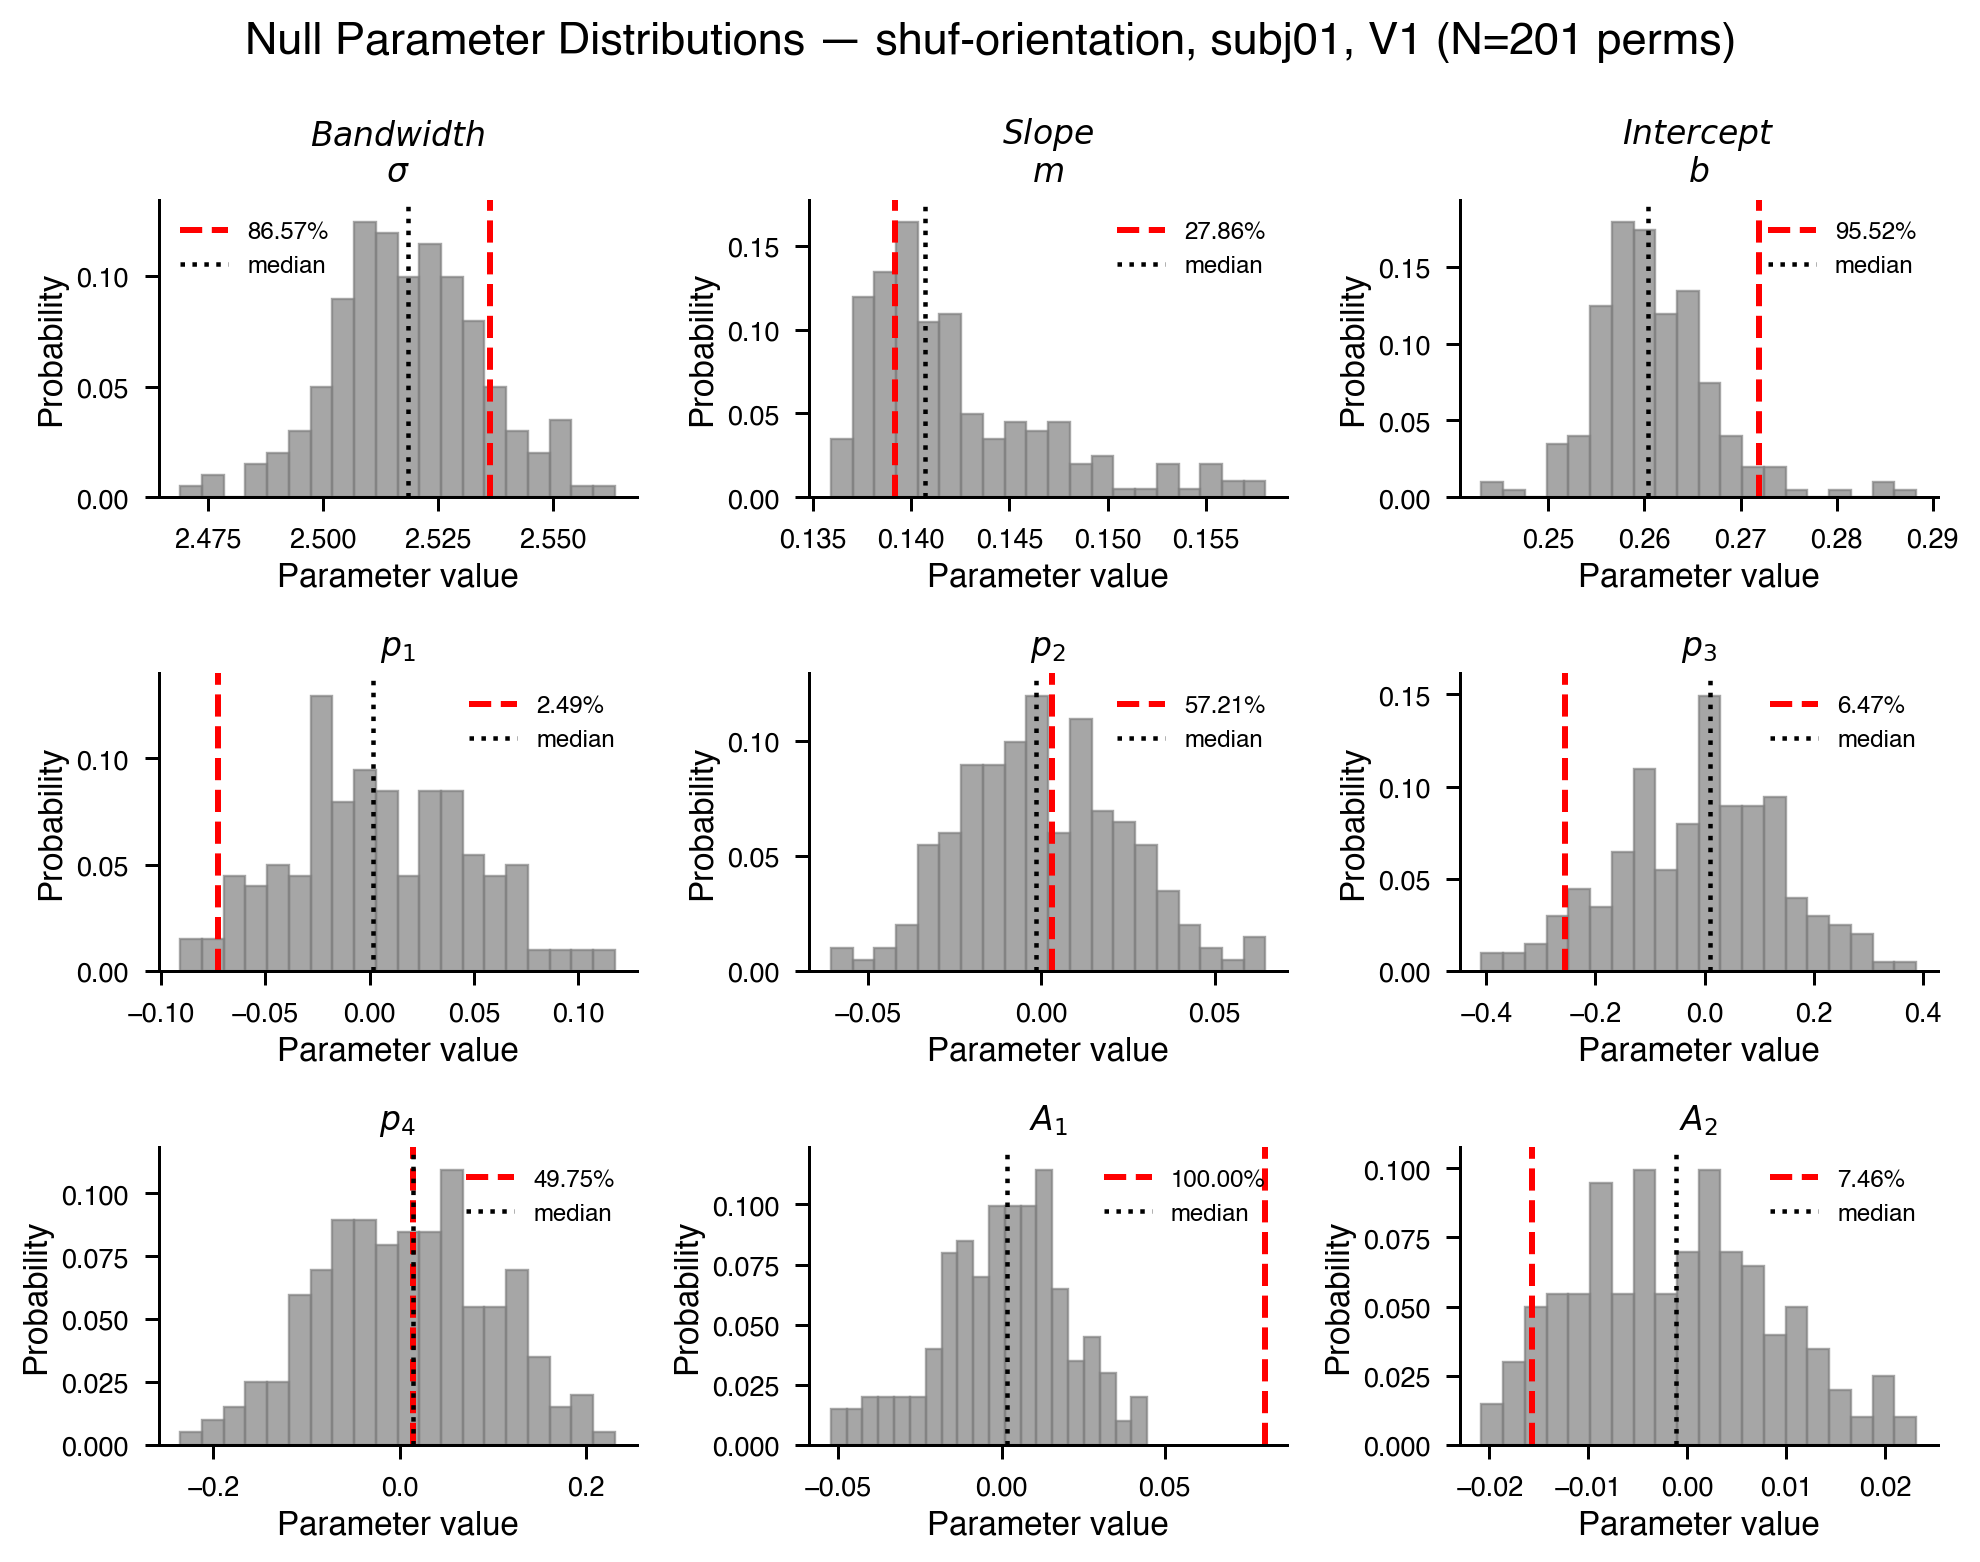

In [9]:
n_perm = null_param_df['perm'].nunique()

fig, _ = vis2D.plot_null_param_value_distributions(
    null_param_df,
    actual_means,
    params=PARAMS_2D,
    plot_median=True,
    title=f'Null Parameter Distributions — shuf-orientation, {subj}, {roi} (N={n_perm} perms)',
    bins=20)

plt.tight_layout()
plt.show()

---
# Null Parameter Distributions — Eccentricity Shuffle (subj01)

Same analysis as above but with eccentricity values shuffled across voxels.

In [10]:
perm_dir_ecc = os.path.join(
    OUTPUT_DIR, 'sfp_model', 'results_2D', dset,
    'perm', 'shuf-eccentricity', subj, '**')

null_model_paths_ecc = sorted(glob.glob(os.path.join(perm_dir_ecc, '*.pt'), recursive=True))
len(null_model_paths_ecc)

201

In [11]:
null_df_ecc = model.load_all_models(null_model_paths_ecc, *['sub', 'lr', 'eph', 'roi', 'perm'])
null_df_ecc['perm'] = null_df_ecc['perm'].astype(int)

null_param_df_ecc = null_df_ecc.groupby('perm')[PARAMS_2D].mean().reset_index()
null_param_df_ecc.shape

(201, 10)

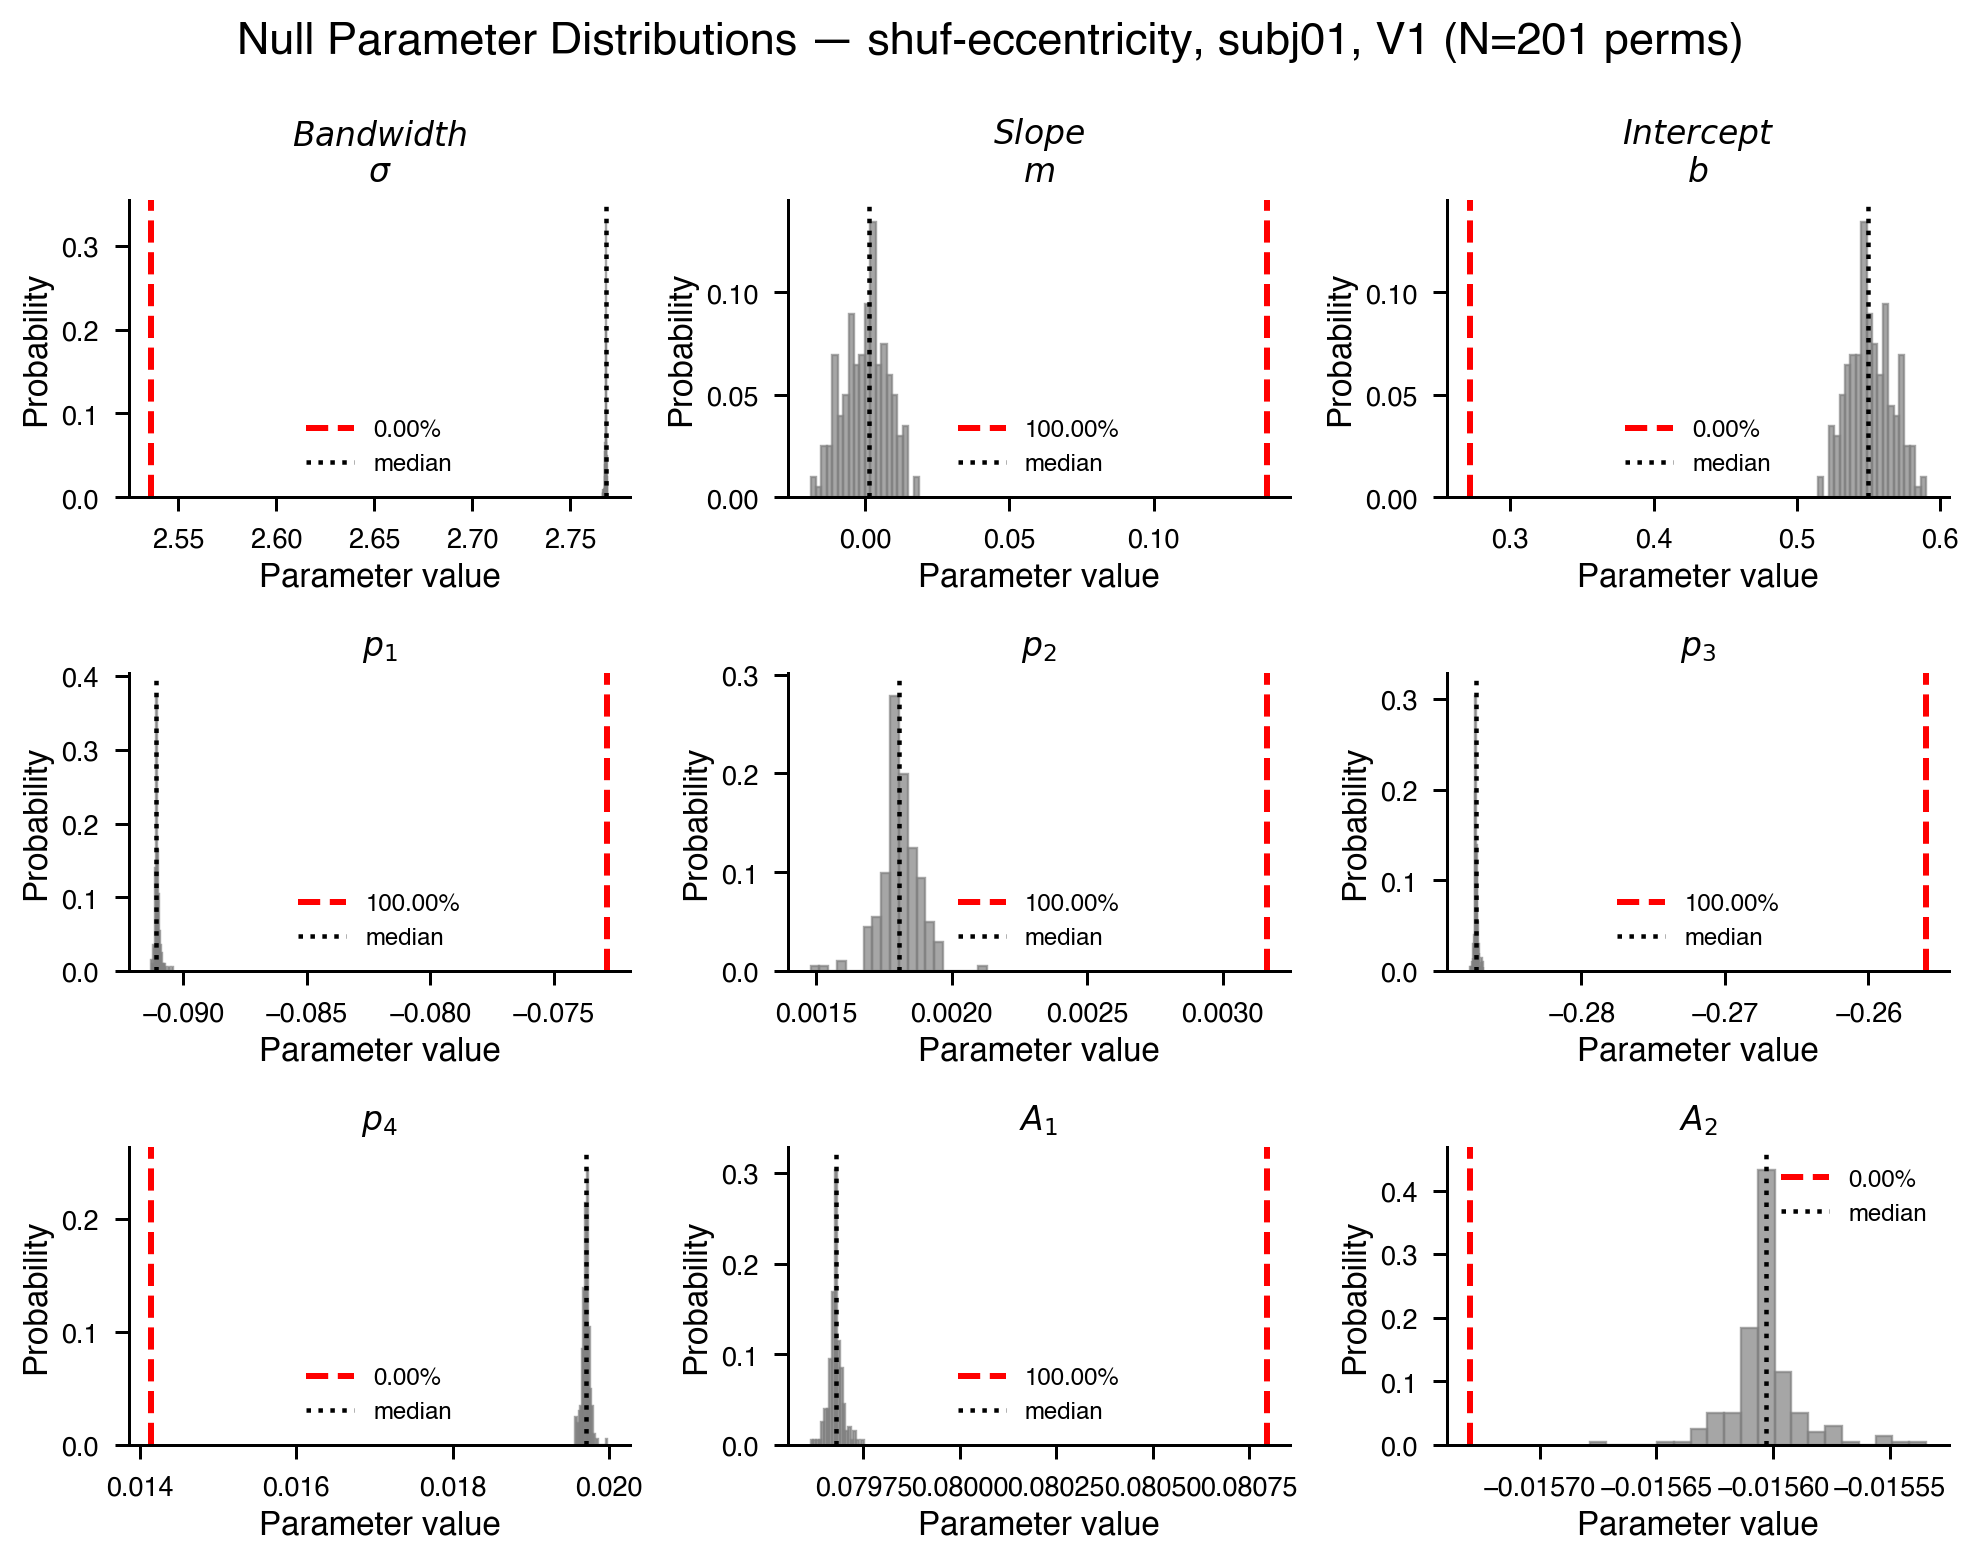

In [12]:
n_perm_ecc = null_param_df_ecc['perm'].nunique()

fig, _ = vis2D.plot_null_param_value_distributions(
    null_param_df_ecc,
    actual_means,
    params=PARAMS_2D,
    plot_median=True,
    title=f'Null Parameter Distributions — shuf-eccentricity, {subj}, {roi} (N={n_perm_ecc} perms)',
    bins=20)

plt.tight_layout()
plt.show()

---
# Null Parameter Distributions — Local SF Shuffle (subj01)

Same analysis as above but with local spatial frequency values shuffled across stimulus classes.

In [13]:
perm_dir_sf = os.path.join(
    OUTPUT_DIR, 'sfp_model', 'results_2D', dset,
    'perm', 'shuf-local_sf', subj, '**')

null_model_paths_sf = sorted(glob.glob(os.path.join(perm_dir_sf, '*.pt'), recursive=True))
len(null_model_paths_sf)

20

In [14]:
null_df_sf = model.load_all_models(null_model_paths_sf, *['sub', 'lr', 'eph', 'roi', 'perm'])
null_df_sf['perm'] = null_df_sf['perm'].astype(int)

null_param_df_sf = null_df_sf.groupby('perm')[PARAMS_2D].mean().reset_index()
null_param_df_sf.shape

(20, 10)

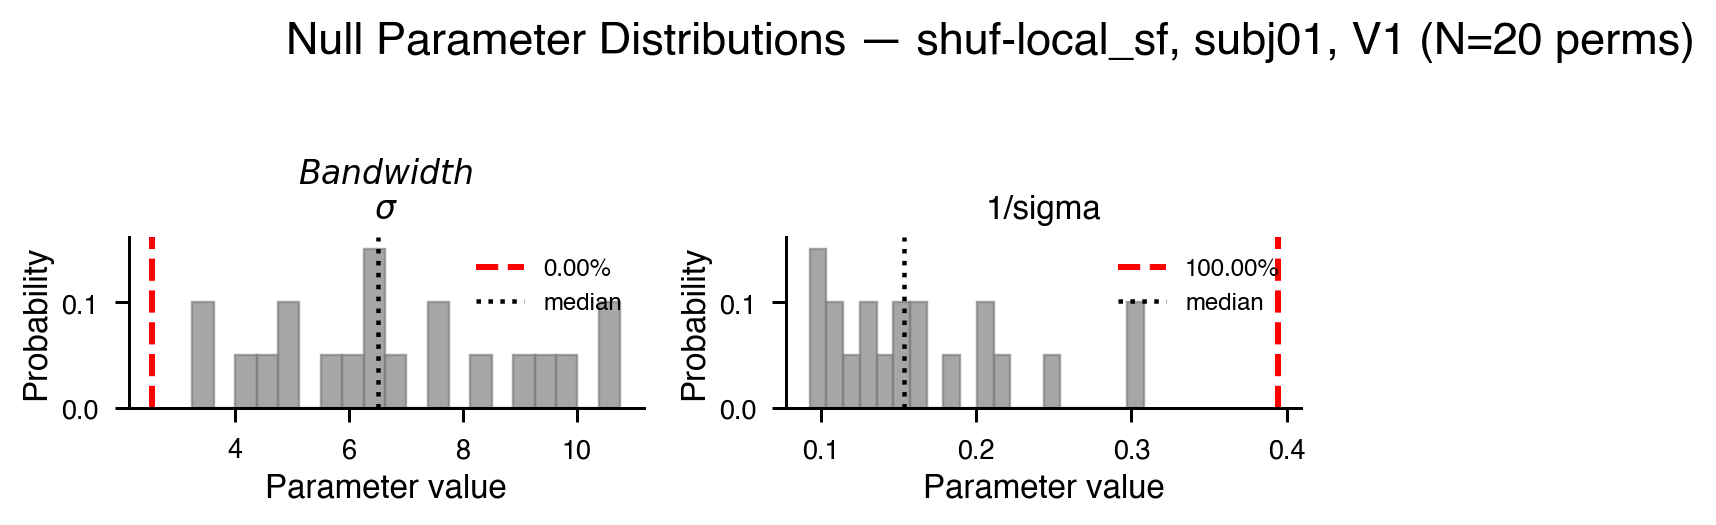

In [16]:
null_param_df_sf['1/sigma'] = 1 / null_param_df_sf['sigma']
actual_means['1/sigma'] = 1 / actual_means['sigma']

n_perm_sf = null_param_df_sf['perm'].nunique()

fig, _ = vis2D.plot_null_param_value_distributions(
    null_param_df_sf,
    actual_means,
    params=['sigma', '1/sigma'],
    plot_median=True,
    title=f'Null Parameter Distributions — shuf-local_sf, {subj}, {roi} (N={n_perm_sf} perms)',
    bins=20)

plt.tight_layout()
plt.show()